<a href="https://colab.research.google.com/github/Mekyyy/Metodology-Data-Science/blob/main/672021078_TugasDUnonVisualisasi_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip CCS-master.zip

Archive:  CCS-master.zip
7fed3ec99524ebd276c16678586bcaa36883b98a
replace CCS-master/README.md? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: CCS-master/README.md    
replace CCS-master/Tasks.md? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: CCS-master/Tasks.md     
replace CCS-master/sample data/customers.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: CCS-master/sample data/customers.csv  
replace CCS-master/sample data/gasstations.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: CCS-master/sample data/gasstations.csv  
replace CCS-master/sample data/products.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: CCS-master/sample data/products.csv  
replace CCS-master/sample data/sample.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: CCS-master/sample data/sample.csv  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/CCS-master/sample data/sample.csv")

In [ ]:
df.head()

,Date,Time,CustomerID,CardID,GasStationID,ProductID,Amount,Price
0,2012-01-01,00:18:00,41113,645177,363,2,93.75,2038.5750
1,2012-01-01,02:05:00,30766,496967,1083,2,132.10,3002.6920
2,2012-01-01,00:27:00,31576,618868,109,5,21.35,462.9240
3,2012-01-01,06:56:00,3800,598481,5298,322,52.50,47.0239
4,2012-01-01,05:46:00,3493,34405,5163,317,70.00,61.8310


#Transaksi Costumer Terbanyak

In [ ]:
custrac = df.groupby('CustomerID')['Amount'].sum()
top5 = custrac.sort_values(ascending=False).head(5)

In [ ]:
top5cus_df = top5.reset_index()
top5cus_df.columns = ['Customers', 'Total Transaction']

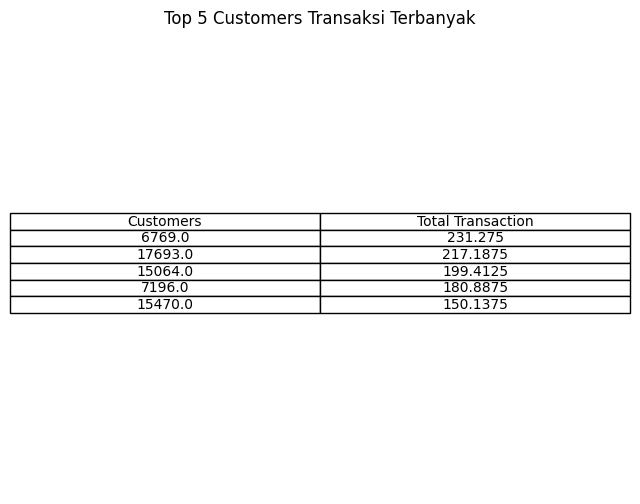

In [ ]:
plt.figure(figsize=(8, 6))
plt.table(cellText=top5cus_df.values,
          colLabels=top5cus_df.columns,
          cellLoc = 'center', rowLoc = 'center',
          loc='center')
plt.axis('off')
plt.title('Top 5 Customers Transaksi Terbanyak')
plt.show()

#Transaksi Gas Terbanyak

In [ ]:
gastrac = df.groupby('GasStationID')['Amount'].sum()
top5gas = gastrac.sort_values(ascending=False).head(5)

In [ ]:
top5gas_df = top5gas.reset_index()
top5gas_df.columns = ['Gas Station', 'Total Transaction']

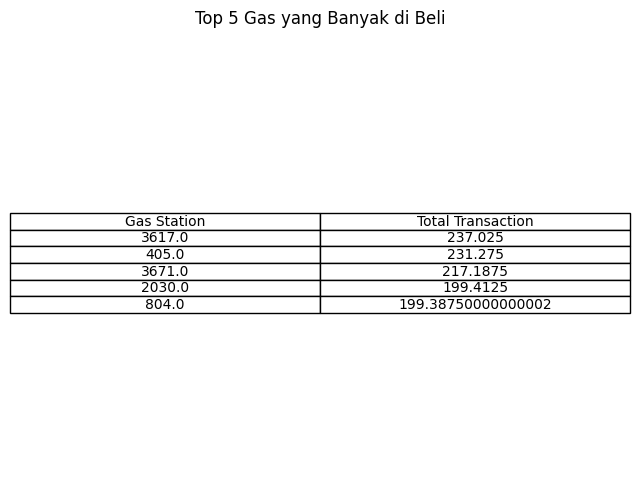

In [ ]:
plt.figure(figsize=(8, 6))
plt.table(cellText=top5gas_df.values,
          colLabels=top5gas_df.columns,
          cellLoc = 'center', rowLoc = 'center',
          loc='center')
plt.axis('off')
plt.title('Top 5 Gas yang Banyak di Beli')
plt.show()

#Waktu Terbaik

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['Day_EN'] = df['Date'].dt.day_name()

In [ ]:
translations = {

    'Sunday': 'Minggu'
}
df['Day'] = df['Day_EN'].map(translations)

In [ ]:
print(df[['Day','Time']])

       Day      Time
0   Minggu  00:18:00
1   Minggu  02:05:00
2   Minggu  00:27:00
3   Minggu  06:56:00
4   Minggu  05:46:00
..     ...       ...
84  Minggu  12:16:00
85  Minggu  07:27:00
86  Minggu  10:05:00
87  Minggu  11:58:00
88  Minggu  11:58:00

[89 rows x 2 columns]


In [ ]:
trans_by_day_hour = df.groupby(['Day', 'Time']).size().reset_index(name='Transaction Count')

In [ ]:
most_transactions = trans_by_day_hour.loc[trans_by_day_hour['Transaction Count'].idxmax()]

In [ ]:
print("Waktu terbaik untuk transaksi paling banyak:")
print("Hari:", most_transactions['Day'])
print("Jam:", most_transactions['Time'])
print("Jumlah Transaksi:", most_transactions['Transaction Count'])

Waktu terbaik untuk transaksi paling banyak:
Hari: Minggu
Jam: 04:40:00
Jumlah Transaksi: 2


Tujuan utama dari analisis data pelanggan adalah untuk memahami perilaku dan preferensi pelanggan guna meningkatkan pengalaman pelanggan, meningkatkan retensi, mengoptimalkan penjualan, dan merancang strategi bisnis yang lebih efektif. Dengan memanfaatkan wawasan dari data pelanggan, perusahaan dapat mengambil langkah-langkah yang lebih tepat sasaran dalam memenuhi kebutuhan pelanggan, meningkatkan loyalitas, dan menciptakan nilai tambah bagi bisnis mereka.